week5

다음 사이트에서 insurance.csv 데이터를 다운 받아 주세요.

https://www.kaggle.com/datasets/mirichoi0218/insurance/code 

###1. Medical Cost Perconal Datasets을 이용한 선형 회귀 문제

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

1.1 'insurance.csv' 데이터셋을 로드하여 insurance 변수에 저장하고, head()를 통해 데이터를 확인하세요.

In [145]:
insurance = pd.read_csv(r'C:\temp\insurance.csv')
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.2 데이터의 정보를 확인하세요.

In [146]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


1.3 데이터의 기본 통계량을 확인하세요.

In [147]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


1.4  'sex', 'smoker', 'region' 세 카테고리 변수는 인코딩이 필요합니다. 'get_dummies'를 이용하여 원핫 인코딩을 진행하세요.

In [148]:
insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


1.5 독립변수(X), 종속변수(y = 'charges')을 분리한 후 'train_test_split'으로 학습 데이터와 테스트 데이터를 분리해주세요. (test_size = 0.3, random_state=0) 

In [149]:
from sklearn.model_selection import train_test_split
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)

1.6 사이킷런 LinearRegression 클래스를 통해 회귀 모델 학습/예측을 수행해주세요.

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)


1.7 사이킷런 API를 이용해 MAE, MSE, RMSE, R2 평가지표로 평가를 수행하고 출력하세요.


In [152]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [153]:
mae = mean_absolute_error(y_test, y_preds)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse) 
r2 = r2_score(y_test,y_preds)

print('MAE : {0:.3f} / MSE : {1:.3f} / RMSE : {2:.3f} / R2 : {3:.3f}'.format(mae,mse,rmse,r2))

MAE : 4011.450 / MSE : 33342497.827 / RMSE : 5774.296 / R2 : 0.791


1.8 LinearRegression의 속성을 이용해 절편과 회귀계수를 출력해주세요.

In [154]:
print('절편값: ', lr.intercept_)
print('회귀 계수 값: ', np.round(lr.coef_, 1))

절편값:  -730.1121662702535
회귀 계수 값:  [   256.4    335.4    472.7     23.8    -23.8 -11718.   11718.     589.
     27.1   -405.7   -210.4]


1.9 coef_ 속성은 회귀계수만을 보여주기 때문에, 어떤 칼럼에 대한 회귀 계수인지 알 수 없습니다. 피처별 회귀계수 값을 매핑하여 높은 순으로 출력하세요.

In [155]:
coef = pd.Series(data=np.round(lr.coef_,1), index=X.columns)
coef.sort_values(ascending=False)

smoker_yes          11718.0
region_northeast      589.0
children              472.7
bmi                   335.4
age                   256.4
region_northwest       27.1
sex_female             23.8
sex_male              -23.8
region_southwest     -210.4
region_southeast     -405.7
smoker_no          -11718.0
dtype: float64

1.10 이번에는 교차검증을 통해 MAE, MSE를 계산해보겠습니다. 'neg'에 주의하여 'cross_val_score'을 실시하고 [개별 negative MAE scores] [개별 MSE scores] 그리고 [평균 RMSE]를 출력해주세요. (cv=3)

In [156]:
from sklearn.model_selection import cross_val_score

In [157]:
lr = LinearRegression()
neg_mae_scores = cross_val_score(lr, X, y, scoring='neg_mean_absolute_error', cv=5)
neg_mse_scores = cross_val_score(lr, X, y, scoring='neg_mean_squared_error', cv=5)
mse_scores = -1*neg_mse_scores
rmse_scores = np.sqrt(mse_scores)
avg_rmse = np.mean(rmse_scores)

print('3 folds의 개별 negative MAE scores : ',np.round(neg_mae_scores,2))
print('3 folds의 개별 MSE scores : ',np.round(mse_scores,2))
print('3 folds의 평균 RMSE : ',np.round(avg_rmse,3))

3 folds의 개별 negative MAE scores :  [-4239.55 -4260.81 -4015.77 -4256.17 -4216.31]
3 folds의 개별 MSE scores :  [37065146.66 38121880.55 32572832.89 39681281.46 37125506.89]
3 folds의 평균 RMSE :  6072.409


1.11 'age', 'bmi', 'children'에 대한 'charges'의 OLS summary를 출력하세요.

In [158]:
import statsmodels.formula.api as smf

results = smf.ols('charges~age+bmi+children', data = insurance).fit()
print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           8.80e-37
Time:                        02:21:30   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6916.2433   1757.480     -3.935      0.0

### 2. 경사하강법

[make_regression()](https://datascienceschool.net/03%20machine%20learning/04.01%20%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D%20%EC%98%88%EC%A0%9C.html)은 가상의 회귀분석 문제를 제공해주는 명렁어입니다. 이 명령어를 이용해 경사하강법 실습을 해보겠습니다.

먼저 다음의 코드를 실행해 X, y, w를 생성해주세요.



In [159]:
from sklearn.datasets import make_regression

X, y, w = make_regression(
    n_samples=50, n_features=1, bias=100, noise=10, coef=True, random_state=0
)

2.1 y는 1차원 배열입니다. 'reshape' 명령어를 통해 y를 2차원 배열로 변환하고, X, y의 shape을 출력해주세요.

In [160]:
y = y.reshape(2,-1)

print(y.shape)
print(X.shape)

(2, 25)
(50, 1)


2.2 X, y의 산점도를 출력해주세요.

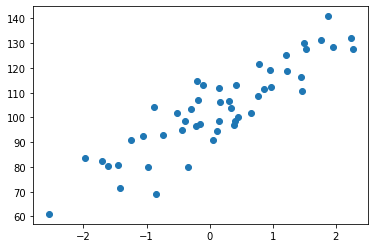

In [161]:
plt.scatter(X,y)

2.3 경사하강법을 위한 get_weight_updates, gradient_descent_stpes, get_cost 함수를 완성해주세요. 빈 괄호를 채워주세요.

In [162]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
  N = len(y)
  w1_update = np.zeros_like(w1)
  w0_update = np.zeros_like(w0)
  y_pred = np.dot(X, w1.T) + w0
  diff = y - y_pred

  w0_factors = np.ones((N,1))

  w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
  w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))    
    
  return w1_update, w0_update

In [163]:
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화. 
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출하여 w1, w0 업데이트 수행. 
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

In [164]:
def get_cost(y,y_pred):
  N = len(y)
  cost = np.sum(np.square(y-y_pred))/N
  return cost

2.4 gradient_descent_steps 함수를 이용해 w1, w0을 계산하여 출력하세요. 또 get_cost 함수를 이용해 실제값과 예측값의 RSS 차이를 출력하세요.

In [165]:
# 예측값과 실제값의 RSS 차이를 계산하는 함수 생성

def gradient_descent_steps(X, y, iters=10000):

    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))

    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0


def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

# 차원때문에 에러가 생기는 것 같은데 이유를 모르겠습니다ㅠㅜ


ValueError: operands could not be broadcast together with shapes (2,25) (50,1) 

2.5 X,y의 산점도와 함께 앞에서 구한 y_pred 기반 회귀선을 그려주세요.

NameError: name 'y_pred' is not defined

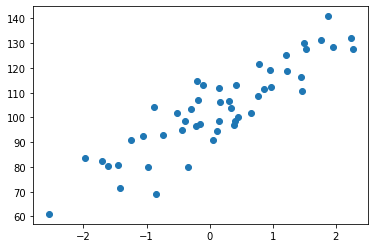

In [ ]:
plt.scatter(X,y)
plt.plot(X, y_pred)

### 3. 규제 선형 모델

#### 
alpha 값의 변화에 따른 릿지 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0, 0.1, 1, 10, 100으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0, 0.1, 1, 10, 100]

In [183]:
insurance = pd.read_csv(r'C:\temp\insurance.csv')
insurance.head()

insurance = pd.get_dummies(insurance, columns=['sex', 'smoker', 'region'])
insurance.head()

from sklearn.model_selection import train_test_split
X = insurance.drop('charges', axis=1)
y = insurance['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)


In [186]:
from sklearn.linear_model import Ridge

alphas = [0, 0.1, 1, 10, 100]

for a in alphas:
    ridge = Ridge(alpha = a)
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores  = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print(avg_rmse, '\n')

1.9021508819934092 

1.9003552209488195 

1.884762735304977 

1.771780015887823 

1.537268053608216 



#### 
릿지 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [196]:
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        model.fit(X_data_n , y_target_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df


sort_column = 'alpha:'+str(alphas[0])
coeff_df =get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data, y_target_n=y_target)
coeff_df.sort_values(by=sort_column, ascending=False)


#######  Ridge #######
alpha 0일 때 5 폴드 세트의 평균 RMSE: 1.902 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.900 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.885 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 1.772 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 1.537 


,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
Width,0.850361,0.844735,0.797161,0.505646,0.085070
Diagonal,0.756132,0.750806,0.705784,0.430830,0.044079
Weight,0.002665,0.002663,0.002640,0.002492,0.002141
Height,-0.763683,-0.761091,-0.739162,-0.604202,-0.394202
Length,-0.862499,-0.856566,-0.806407,-0.500035,-0.068597


#### 
alpha 값의 변화에 따른 라쏘 회귀를 수행해보겠습니다.
릿지의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [188]:
from sklearn.linear_model import Lasso




In [195]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)


#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1.838 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.685 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1.377 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.520 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.812 


#### 
라쏘 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [190]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
Width,0.081836,0.000000,0.000000,-0.000000,-0.000000
Diagonal,0.020875,0.000000,-0.000000,-0.000000,-0.000000
Weight,0.002278,0.002258,0.001423,0.000915,-0.001018
Length,-0.044000,-0.014942,-0.000000,-0.000000,-0.000000
Height,-0.406400,-0.384810,-0.336295,-0.278175,-0.051690


#### 
alpha 값의 변화에 따른 엘라스틱넷 회귀를 수행해보겠습니다. l1_ratio는 0.5로 고정하겠습니다.
엘라스틱넷의 alpha 값을 0.07, 0.1, 0.5, 1, 3으로 변화시키면서 cv=5인 교차검증을 수행하고, 그에 따른 RMSE의 평균값을 출력해주세요.

alphas = [0.07, 0.1, 0.5, 1, 3]

In [192]:
from sklearn.linear_model import ElasticNet

elastic_alphas = [0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 1.870 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 1.777 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 1.392 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 1.444 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 1.791 


#### 
엘라스틱 회귀에서 alpha 값의 변화에 따른 피처의 회귀 계수 값을 DataFrame으로 출력해주세요.

In [193]:
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
Width,0.243903,0.058294,0.000000,-0.000000,-0.000000
Diagonal,0.174380,0.001313,-0.000000,-0.000000,-0.000000
Weight,0.002349,0.002264,0.001523,0.001129,-0.000259
Length,-0.214868,-0.022102,-0.000000,-0.000000,-0.000000
Height,-0.480752,-0.395365,-0.347741,-0.302586,-0.139982


### 4.Logistic Regression

Dataset <fish.csv>를 다운 받아주세요!
#### fish의 Weight, Length, Diagnal, Height, Width 정보를 바탕으로 fish의 Species를 분류하는 예제

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

#### 'fish.csv'로 fish_df를 생성하세요

In [167]:
fish_df = pd.read_csv(r'C:\temp\fish.csv')


#### fish 데이터 세트의 target 배열은 Species입니다.
#### fish_df를 y_target, X_data로 분리해주세요

In [178]:

X_data = fish_df.drop('Species', axis=1,inplace=False)
y_target = fish_df['Species']

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fish_df_t = scaler.fit_transform(X_data)

from sklearn.preprocessing import LabelEncoder

lbl = LabelEncoder() 
lbl.fit(list(y_target.values)) 
y_target = lbl.transform(list(y_target.values))



#### X_data와 y_target을 X_train, X_test, y_train, y_test으로 나누세요. (test_size=0.3, random_state=42)

In [179]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=42)

#### StandardScaler를 이용해 데이터 변환을 해주세요

In [181]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

fish_df_t = scaler.fit_transform(X_data)


#### 로지스틱 회귀를 이용해서 학습 및 예측을 수행하고 정확도와 ROC-AUC값을 구하세요 (solver = liblinear, C=20, max_iter=1000)

In [182]:
from sklearn.metrics import accuracy_score, roc_auc_score

lr_clf = LogisticRegression(solver = 'liblinear', C=20, max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_preds = lr_clf.predict(X_test)

print('accuracy: {:0.3f}'.format(accuracy_score(y_test, lr_preds)))
print('roc_auc: {:0.3f}'.format(roc_auc_score(y_test , lr_preds)))

accuracy: 0.938


ValueError: multi_class must be in ('ovo', 'ovr')